### Usando dados do sitema de energia aberto para entender a serie temporal dos dados

- *Data* : A data está no formato yyyy-mm-dd.
- *Consumo* : Indica o consumo de eletricidade em GWh.
- *Solar* : Indica a produção de energia solar em GWh.
- *Eólica* + Solar : Representa a soma da produção de energia solar e eólica em GWh.

Questoes levantadas para enter os dados:

- Como o consumo e a produção de eletricidade variam ao longo do tempo na Alemanha?

#### Imports 


In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load time series dataset
df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df_power.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [3]:
df_power.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


#### Limpeza de Dados

In [5]:
df_power.shape

(4383, 5)

In [7]:
df_power.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [8]:
#converter o formado object para datetime
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [9]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [11]:
#definindo a coluna Date como Indice do dataframe, por que na analise de series temporais a coluna de Indice é sempre uma coluna datetime
df_power = df_power.set_index('Date')
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [12]:
df_power.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [15]:
# Adicionando colunas para Mes,ano e nome do dia da semana
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name()


In [16]:
df_power.sample(5,random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


#### Indexação baseada em Tempo

In [17]:
df_power.loc['2015-10-02']

Consumption     1391.05
Wind             81.229
Solar           160.641
Wind+Solar       241.87
Year               2015
Month                10
Weekday Name     Friday
Name: 2015-10-02 00:00:00, dtype: object

In [18]:
df_power.loc['2017-01-01':'2017-12-30']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,Sunday
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,Monday
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,Tuesday
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,Wednesday
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,Thursday
...,...,...,...,...,...,...,...
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday


### Visualização para series Temporais

In [25]:
sns.set(rc={'figure.figsize':(16,4)})
plt.rcParams['figure.dpi'] = 150

Criando um grafico linear de serie temporal do consumo diario completo 

<Axes: xlabel='Date'>

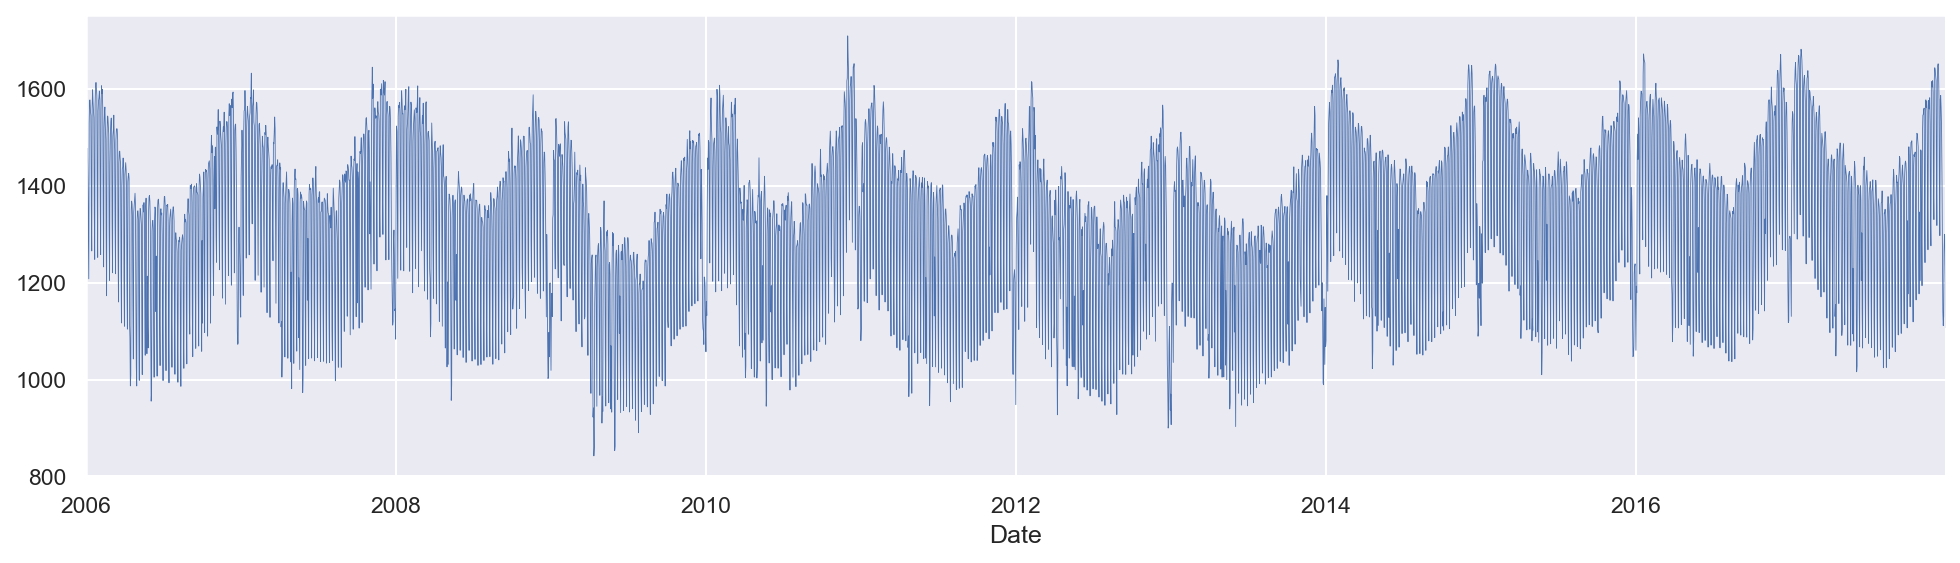

In [27]:
df_power['Consumption'].plot(linewidth=0.4)

Usando os pontos para representar graficamente os dados de todas as colunas

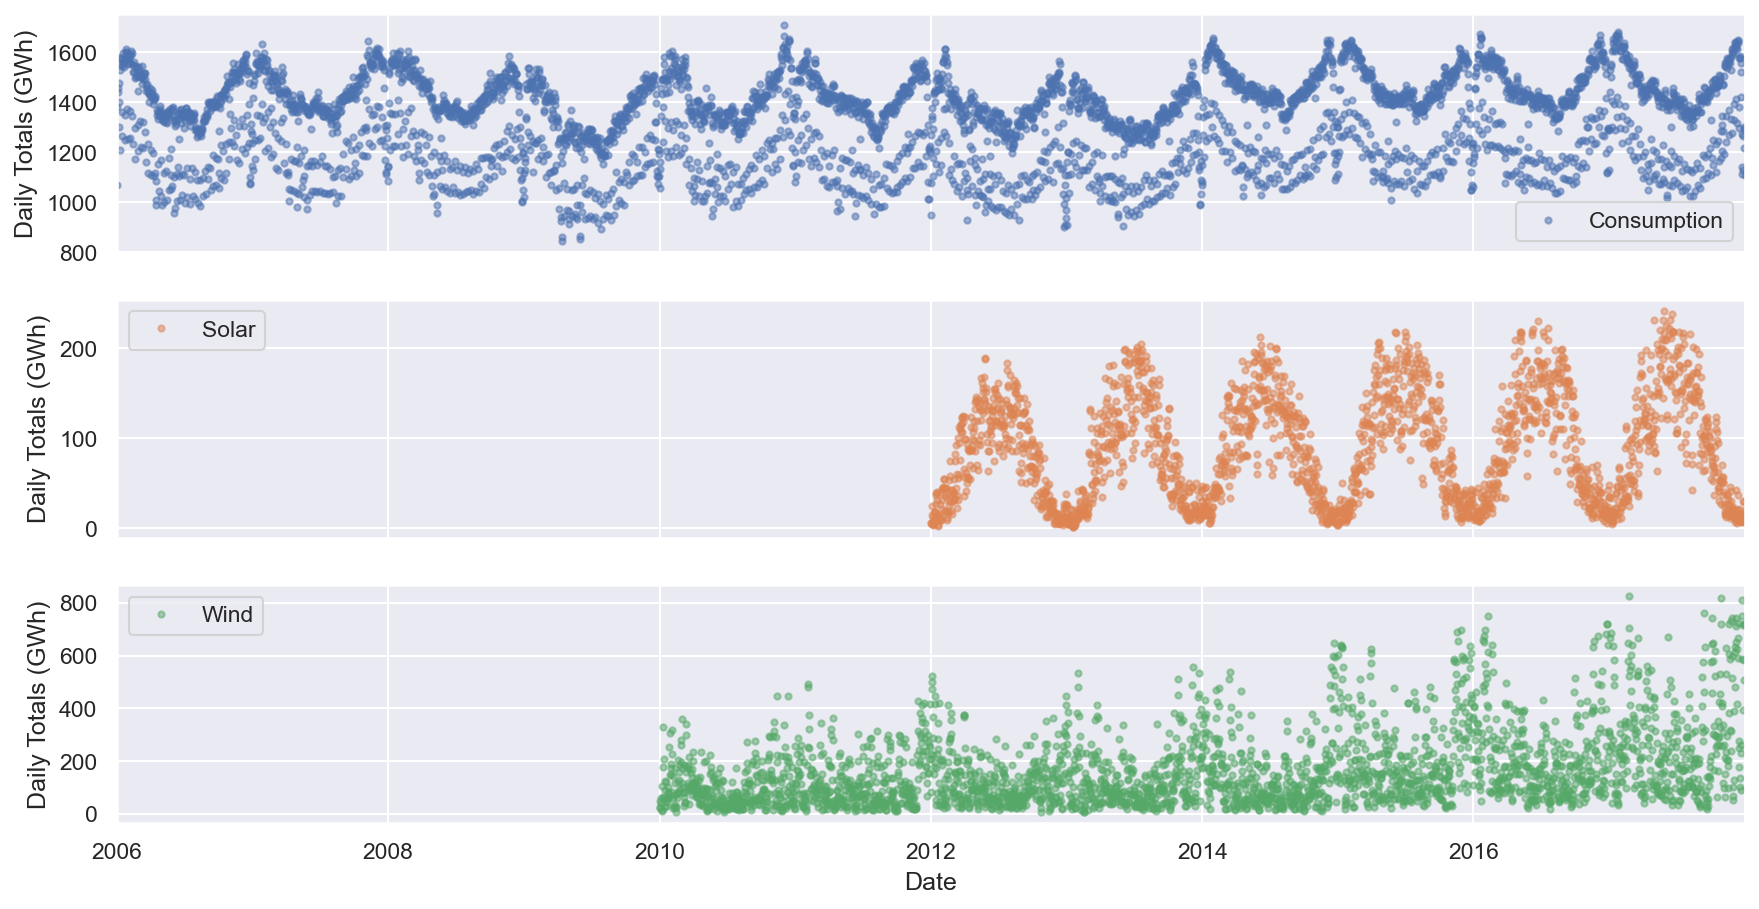

In [33]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
